In [1]:
from IPython.display import Image

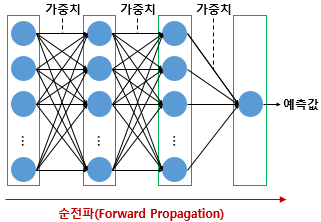

In [2]:
Image("순전파.png")

<b>순전파</b>
    <p> 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정</p>

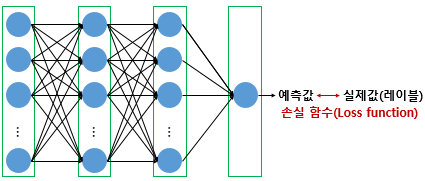

In [3]:
Image("손실함수.png")

<b>순전파</b>
    <p>실제값과 예측값의 차이를 수치화해주는 함수 오차가 클 수록 손실 함수의 값이 큼 </p>
    <p>회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 사용

In [11]:
Image("mse.png")

In [9]:
Image("크로스엔트로피.png")

<p>
    낮은 확률로 예측해서 맞추거나, 높은 확률로 예측해서 맞추는 경우 loss가 큼.<br>
    keras의 model.compile()에서는 이진 분류(BInary Classification)의 경우,
    binary_crossentropy를 사용.<br>
    <b> -> model.compile(loss='binary_crossentropy', optimazer='adam', metrics=['acc'])</b>

<p>
    다중 클래스 분류(Multi-Class Classification의 경우, catrgorical_crossentropy 사용<br>
    <b> -> model.compile(loss='categorical_crossentropy', optimazer='adam', metrics=['acc'])</b>

<h2> 옵티마이저(Optimizer) </h2>
<p> 손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라짐</p>
<p> 여기서 <b>배치(Batdh)</b>라는 개념에 대한 이해가 중요</p>
<p> 배치(Batch)란, 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양</p>

<h3> 배치 경사 하강법(Batch Gradient Descent)</h3>
<p> 오차를 구할 때 전체 데이터를 고려 (1 에포크에 모든 배개변수 업데이트를 단 한 번 수행)</p>
<p>전체 데이터를 고려해서 학습하므로 에포크당 시간이 오래 걸림, 메모리를 크게 요구하나 글로벌 미니멈을 찾을 수 있음</p>
<p><b>model.fit(X_train, y_train, batch_size=len(train_X))</b>

<h3> 확률적 경사 하강법(Stochastic Gradient Descent)</h3>
<p> 기존의 배치 경사 하강법은, 전체 데이터의 계산의 시간 단점이 있음</p>
<p> 확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터만 계산</p>
<p><b>model.fit(X_train, y_train, batch_size=1)</b>

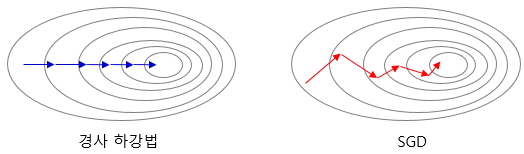

In [12]:
Image("경사하강법SGD.png")

<h3> 미니 배치 경사 하강법(Mini-Batch Gradient Descent)</h3>
<p> 전체 데이터도 아니고, 1개의 데이터도 아니고, 정해진 양에 대해서만 계산하여 매개변수의 값을 조정하는 경사 하강법, 실제로 많이 사용되는 경사 하강법</b>
<p><b>model.fit(X_train, y_train, batch_size=32)</b>

<h3> 모멘텀(Momentum)</h3>
<p> 관성이라는 물리학의 법칙을 응용, 경사 하강법에서 계산된 접선의 기울기에 한 시점(step) 전의 접선의 기울기값을 일정한 비율만큼 반영</p>
<p>이렇게 하면 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라고 관성의 힘으로 넘어서는 효과를 줌</p>
<p><b>keras.optimizers.SGD(1r = 0.01, momentum = 0.9)</b>

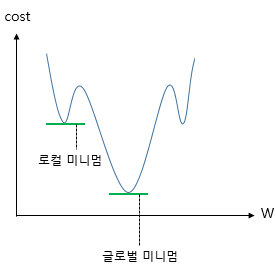

In [13]:
Image("로컬미니멈.png")

<p> 다시 말해, 로컬 미니멈에 도달하였을 때, 기울기가 0이라서 기존의 경사 하강법이라면 이를 글로벌 미니멈으로 잘못 인식</p>
<p> 모멘텀은 관성의 힘을 빌려 로컬 미니멈에서 탈출하는 효과를 가질 수 있음</p>

<h3> 모멘텀(Momentum)</h3>
<p> 관성이라는 물리학의 법칙을 응용, 경사 하강법에서 계산된 접선의 기울기에 한 시점(step) 전의 접선의 기울기값을 일정한 비율만큼 반영</p>
<p>이렇게 하면 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라고 관성의 힘으로 넘어서는 효과를 줌</p>
<p><b>keras.optimizers.SGD(1r = 0.01, momentum = 0.9)</b>

<h3> 아다그라드(Adagrad)</h3>
<p> 매개변수들은 각자 의미하는 바가 다름, 그러므로 모든 매개변수에 동일한 학습률을 적용하는 것은 비효율적, 아다그라드는 서로 다른 학습률을 적용</p>
<p> 이 때, 변화가 많은 매개변수는 학습률이 작게, 적은 매개변수는 높게 설정</p>
<p><b>keras.optimizers.Adagrad(1r = 0.01, epsilon=1e-6)</b>

<h3> 알엠에스프롭(RMSprop)</h3>
<p> 아다그라드는 학습을 계속 진행한 경우, 나중에 가서는 학습률이 지나치게 떨어지는 단점이 있음, 이를 다른 수식으로 대체하여 단점을 개선</p>
<p><b>keras.optimizers.RMSprop(1r = 0.001, rho = 0.9, epsilon=1e-06)</b>

<h3> 아담(Adam)</h3>
<p> 아담은 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법</p>
<p><b>keras.optimizers.Adam(1r = 0.001, beta_1 = 0.9, beata_2=0.999,epsilon=None, decay=0.0, amsgrad=False)</b>

<h3> 에포크, 배치크기와 이터레이션 </h3>
<p> 사람도 공부하는 방법이 다르듯, 기계도 공부 방법을 다르게 설정할 수 있음</p>

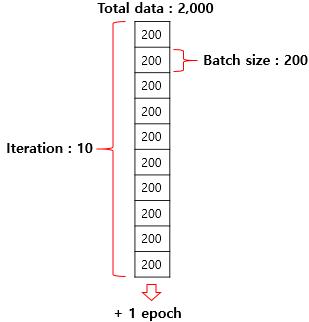

In [15]:
Image("batchandepochiteration.png")

<h2> 에포크 </h2>
<p> 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태를 말 함</p>
<p> 전체 데이터를 하나의 문제지에 비유하자면, 모든 문제를 끝까지 풀고, 채점을 하여 공부를 한 번 끝낸 상태</p>
<p> 에포크 횟수가 지나치거나 너무 적으면 과적합과 과소적합이 발생할 수 있음</p>

<h2> 배치 크기(Batch Size) </h2>
<p> 몇 개의 데이터 단위로 매개변수를 업데이트 하는지</p>
<p> 현실로 비유하자면, 문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인</p>
<p> 기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고, 옵티마이저가 매개변수를 업데이트</p>
<p> 여기서 중요한 포인트는 업데이트가 시작되는 시점이 정답지/실제값을 확인하는 시점</p>
<p> 사람이 2,000문제가 수록되어 있는 문제지의 문제를 200개 단위로 풀고 채점한다고 하면, 배치 크기는 200</p>
<p> 배치 크기와 배치의 수는 다른 개념, 전체 데이터가 2,000일 떄, 배치 크기를 200으로 준다면 배치의 수는 10</p>
<p> 이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 함, 이때 배치의 수를 이터레이션 이라고 함</p>

<h2> 이터레이션(Iteration) </h2>
<p> 한 번 에포크를 끝내기 위해서 필요한 배치의 수, 또는 한 번의 ㅇ